# Abtract

__This project explores the use of machine learning to analyze public sentiment from social media platforms. By leveraging natural language processing (NLP) techniques, it processes and classifies text data into positive, negative, or neutral sentiments. The analysis provides insights into trends, customer feedback, and public opinion on various topics. The model is trained on a labeled dataset, fine-tuned for accuracy, and evaluated using key metrics like precision, recall, and F1-score. The findings highlight the potential of AI-driven sentiment analysis in enhancing decision-making for businesses, marketing strategies, and public policy development.__

# Importing libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from lazypredict.Supervised import LazyClassifier,LazyRegressor
from textblob import TextBlob
import nltk
import re
import string
from nltk.corpus import stopwords

%matplotlib inline

# Import dataset

In [26]:
df=pd.read_csv('sentiment_analysis.csv')

In [27]:
df.head(3)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook


# Exploring data

In [28]:
df.shape

(499, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [30]:
# Checking if there is any missing values
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [31]:
df['sentiment'].value_counts()

neutral     199
positive    166
negative    134
Name: sentiment, dtype: int64

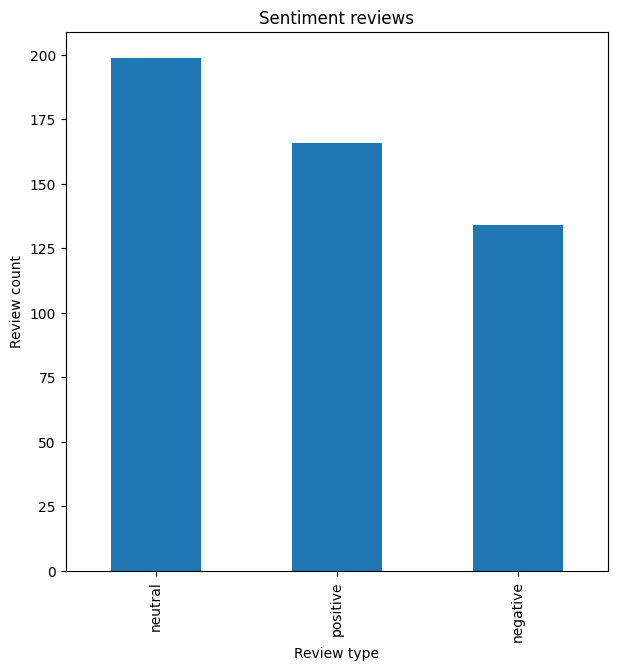

In [35]:
# Visualizing the revews
df['sentiment'].value_counts().plot(kind='bar',title='Sentiment reviews',figsize=(7,7))
plt.xlabel('Review type')
plt.ylabel('Review count')
plt.show();

# Data Preprocessing

In [36]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [37]:
def text_clean(text):
    text=re.sub(r'[^\w\s]', '', text)
    text=text.lower()
    cleaned = ' '.join( lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return cleaned

In [38]:
df['cleaned_text']=df['text'].apply(text_clean)

In [39]:
print(df[['text', 'cleaned_text']].head())

                                                text  \
0              What a great day!!! Looks like dream.   
1     I feel sorry, I miss you here in the sea beach   
2                                     Don't angry me   
3  We attend in the class just for listening teac...   
4                  Those who want to go, let them go   

                                        cleaned_text  
0                          great day look like dream  
1                          feel sorry miss sea beach  
2                                         dont angry  
3  attend class listening teacher reading slide n...  
4                                     want go let go  


In [57]:
# Polirizing the sentiments from social media users

def Sentiment_label(text):
    blob=TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity>0:
        return 1
    elif polarity<0:
        return -1
    else:
        return 0
    

In [41]:
df['Sentiment_label']=df['text'].apply(Sentiment_label)

In [42]:
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,cleaned_text,Sentiment_label
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,great day look like dream,1
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,feel sorry miss sea beach,-1
2,2017,8,18,night,Don't angry me,negative,Facebook,dont angry,-1
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,attend class listening teacher reading slide n...,0
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,want go let go,0
...,...,...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter,according quarter family six live poverty,1
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram,plan spend money going well,0
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook,uploading bamboozle picture facebook,0
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter,congratulation guy finish month early booo,1


In [43]:
df.drop(columns=['Year','Month','Day','Time of Tweet','Platform','text','sentiment'],inplace=True)

In [44]:
df.head(3)

,cleaned_text,Sentiment_label
0,great day look like dream,1
1,feel sorry miss sea beach,-1
2,dont angry,-1


# Validation & Model buiding

In [45]:
x=df['cleaned_text']
y=df['Sentiment_label']

In [51]:
#Validating the data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=0)

In [52]:
vectorizer = CountVectorizer()

In [53]:
train_vx = vectorizer.fit_transform(train_x)
test_vx = vectorizer.transform(test_x)

In [54]:
model = LogisticRegression()
model.fit(train_vx,train_y)

LogisticRegression()

In [55]:
y_pred = model.predict(test_vx)

In [58]:
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(test_y, y_pred))

Accuracy Score: 0.82
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.31      0.48        16
           0       0.68      0.98      0.80        46
           1       0.96      0.83      0.89        63

    accuracy                           0.82       125
   macro avg       0.88      0.71      0.72       125
weighted avg       0.86      0.82      0.80       125



__The model is quite good as it is able to make correct predictions 82% of the time. However, it is recommended that a better model be used for  much better accuracy and precision.__